In [1]:
# Check Python Version
import sys
import scipy
import numpy
import matplotlib
import pandas
import sklearn

print('Python: {}'.format(sys.version))
print('scipy: {}'.format(scipy.__version__))
print('numpy: {}'.format(numpy.__version__))
print('matplotlib: {}'.format(matplotlib.__version__))
print('pandas: {}'.format(pandas.__version__))
print('sklearn: {}'.format(sklearn.__version__))

Python: 3.6.6 |Anaconda, Inc.| (default, Oct  9 2018, 12:34:16) 
[GCC 7.3.0]
scipy: 1.2.1
numpy: 1.16.4
matplotlib: 3.0.3
pandas: 0.25.2
sklearn: 0.21.3


In [2]:
import pandas as pd
data=pd.read_csv('/kaggle/input/breast-cancer-wisconsin (1).data')

In [3]:
import numpy as np
from sklearn.model_selection import cross_validate
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
# Load Dataset

names = ['id', 'clump_thickness', 'uniform_cell_size', 'uniform_cell_shape',
       'marginal_adhesion', 'single_epithelial_size', 'bare_nuclei',
       'bland_chromatin', 'normal_nucleoli', 'mitoses', 'class']
df = pd.read_csv('/kaggle/input/breast-cancer-wisconsin (1).data',names=names)


In [5]:
import pandas_profiling as pf 
profile=df.profile_report(style={'full_width':True})

In [6]:
profile

In [7]:
x=profile.get_rejected_variables()
x.append('id')

In [8]:
df.drop(columns=['id'],inplace=True)

In [9]:
# Let explore the dataset and do a few visualizations
print(df.loc[10])

# Print the shape of the dataset
print(df.shape)

clump_thickness           1
uniform_cell_size         1
uniform_cell_shape        1
marginal_adhesion         1
single_epithelial_size    1
bare_nuclei               1
bland_chromatin           3
normal_nucleoli           1
mitoses                   1
class                     2
Name: 10, dtype: object
(699, 10)


In [10]:
# Describe the dataset
print(df.head())

   clump_thickness  uniform_cell_size  uniform_cell_shape  marginal_adhesion  \
0                5                  1                   1                  1   
1                5                  4                   4                  5   
2                3                  1                   1                  1   
3                6                  8                   8                  1   
4                4                  1                   1                  3   

   single_epithelial_size bare_nuclei  bland_chromatin  normal_nucleoli  \
0                       2           1                3                1   
1                       7          10                3                2   
2                       2           2                3                1   
3                       3           4                3                7   
4                       2           1                3                1   

   mitoses  class  
0        1      2  
1        1      2  
2       

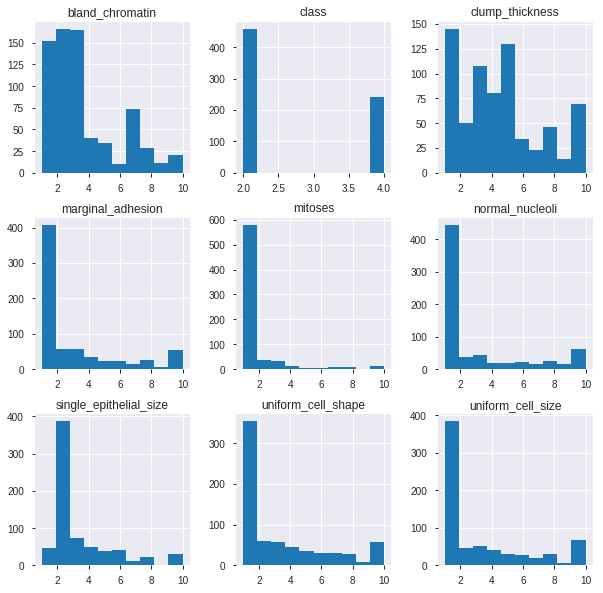

In [11]:
# Plot histograms for each variable
df.hist(figsize = (10, 10))
plt.show()

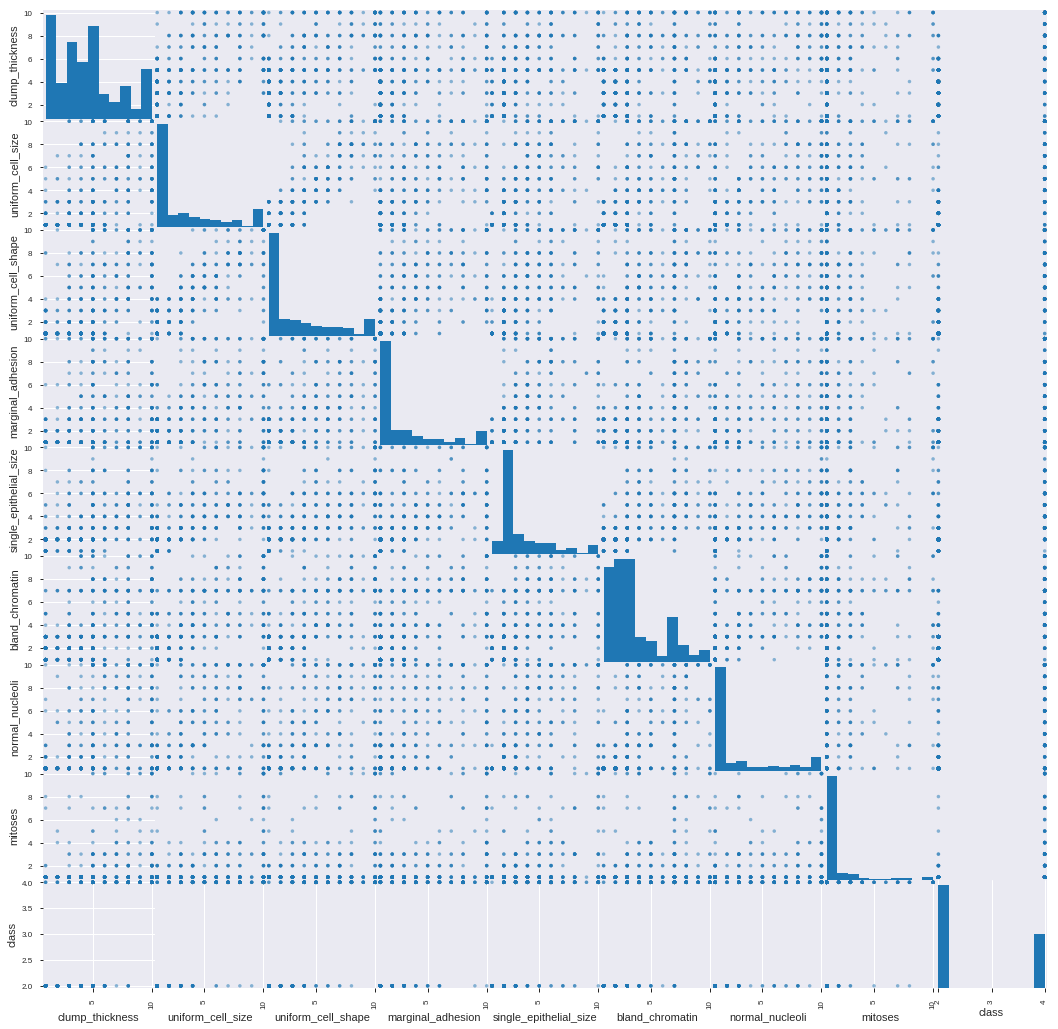

In [12]:
# Create scatter plot matrix
scatter_matrix(df, figsize = (18,18))
plt.show()

In [13]:
df.replace('?',-9999,inplace=True)

In [14]:
# Create X and Y datasets for training
from sklearn.model_selection import train_test_split
X = np.array(df.drop(['class'], 1))
y = np.array(df['class'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [15]:
# Testing Options
seed = 8
scoring = 'accuracy'

In [16]:
# Define models to train
models = []
models.append(('KNN', KNeighborsClassifier(n_neighbors = 5)))
models.append(('SVM', SVC()))

# evaluate each model in turn
results = []
names = []

for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state = seed)
    cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

KNN: 0.966039 (0.021774)
SVM: 0.950000 (0.031744)


In [17]:
# Make predictions on validation dataset

for name, model in models:
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    print(name)
    print(accuracy_score(y_test, predictions))
    print(classification_report(y_test, predictions))
    
# Accuracy - ratio of correctly predicted observation to the total observations. 
# Precision - (false positives) ratio of correctly predicted positive observations to the total predicted positive observations
# Recall (Sensitivity) - (false negatives) ratio of correctly predicted positive observations to the all observations in actual class - yes.
# F1 score - F1 Score is the weighted average of Precision and Recall. Therefore, this score takes both false positives and false 

KNN
0.9571428571428572
              precision    recall  f1-score   support

           2       0.95      0.99      0.97        93
           4       0.98      0.89      0.93        47

    accuracy                           0.96       140
   macro avg       0.96      0.94      0.95       140
weighted avg       0.96      0.96      0.96       140

SVM
0.9714285714285714
              precision    recall  f1-score   support

           2       0.99      0.97      0.98        93
           4       0.94      0.98      0.96        47

    accuracy                           0.97       140
   macro avg       0.96      0.97      0.97       140
weighted avg       0.97      0.97      0.97       140



In [18]:
clf = SVC()

clf.fit(X_train, y_train)
accuracy = clf.score(X_test, y_test)
print(accuracy)

example_measures = np.array([[4,2,1,1,1,2,3,2,1]])
example_measures = example_measures.reshape(len(example_measures), -1)
prediction = clf.predict(example_measures)
print(prediction)

0.9714285714285714
[2]


after dropping the rejected column
